In [31]:
#Independent Lab: Inferential Statistics

import pandas as pd  # pandas for data
import matplotlib.pyplot as plt  # plots for visuals
import seaborn as sns  # fancy plots
import scipy.stats as sts  # stats packages
import statsmodels.api as sm  # regression tool
import statsmodels.formula.api as smf  # formula interface

# read the file
df = pd.read_csv("ect_data.txt", sep="\t")  # tab sep like the last one
print("data preview:\n", df.head())  # check top rows

model = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + satis01 + satis02', data=df).fit()  # regression model with 5 predictors

print("regression summary:\n", model.summary())  #Check

data preview:
    attitude1_01  attitude1_02  attitude1_03  attitude1_04  intent1_01  \
0             6             6             6             6           6   
1             7             7             7             7           7   
2             6             6             6             6           7   
3             7             7             7             7           6   
4             7             7             6             6           7   

   intent1_02  intent1_03  intent1_04  peruse01  peruse02  peruse03  peruse04  \
0           6           6           6         6         4         5         5   
1           7           7           7         7         7         7         7   
2           7           7           7         6         5         5         5   
3           6           7           6         5         5         5         5   
4           7           7           6         6         6         7         7   

   satis01  satis02  satis03  satis04  
0        5        5

In [33]:
#Linear and Multiple Regression

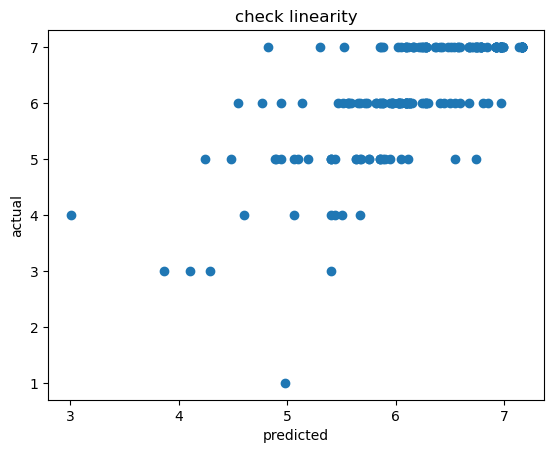

In [35]:
# make predictions from model
df["predicted"] = model.fittedvalues  # get predicted y
df["actual"] = df["intent1_01"]  # the real y

# scatterplot for linearity
plt.scatter(df["predicted"], df["actual"])  # see if dots follow a line
plt.xlabel("predicted")  # label x
plt.ylabel("actual")  # label y
plt.title("check linearity")  # name the chart
plt.show()  # show it

In [37]:
predictors = df[["attitude1_01", "attitude1_02", "peruse01", "satis01", "satis02"]] # grab the 5 predictors
print("correlation table:\n", predictors.corr())  # see if any super high (like > 0.9) check the correlation matrix

correlation table:
               attitude1_01  attitude1_02  peruse01   satis01   satis02
attitude1_01      1.000000      0.781832  0.576265  0.569608  0.549134
attitude1_02      0.781832      1.000000  0.480259  0.513672  0.517255
peruse01          0.576265      0.480259  1.000000  0.399931  0.321710
satis01           0.569608      0.513672  0.399931  1.000000  0.870708
satis02           0.549134      0.517255  0.321710  0.870708  1.000000


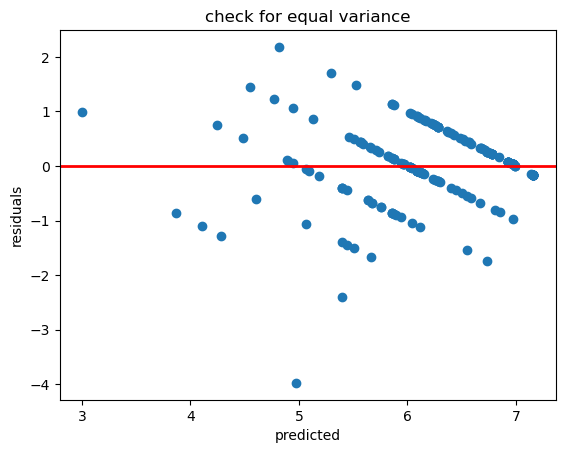

In [39]:
df["residuals"] = model.resid  # difference between real and predicted
# plot to check equal variance
plt.scatter(df["predicted"], df["residuals"])  # spread of residuals
plt.axhline(0, color="red", lw=2)  # baseline
plt.xlabel("predicted")  # x label
plt.ylabel("residuals")  # y label
plt.title("check for equal variance")  # title
plt.show()  # show it

In [41]:
from statsmodels.stats.stattools import durbin_watson # grab durbin-watson from summary
dw = durbin_watson(model.resid)  # test stat
print("durbin-watson value:", dw)  # close to 2 is okay

durbin-watson value: 1.9294735718912368


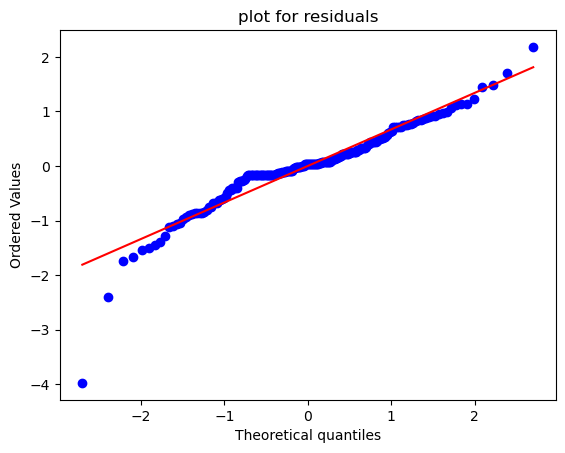

shapiro test result: ShapiroResult(statistic=0.9212982179983521, pvalue=6.787834969166733e-09)


In [43]:
sts.probplot(df["residuals"], dist="norm", plot=plt)  # qq plot to check normalityare dots on line?
plt.title("plot for residuals")  # title
plt.show()

shapiro_test = sts.shapiro(df["residuals"])  # # test shapiro test for normality
print("shapiro test result:", shapiro_test)  # p > 0.05 check

In [47]:
# model equation: intent1_01 = 0.9961 + (0.3098 * attitude1_01) + (0.1481 * attitude1_02) + (0.2337 * peruse01) + (0.1676 * satis01) + (0.0215 * satis02)
print(model.summary())  # this shows f-test, t-tests, r-squared, and more

                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           9.40e-31
Time:                        18:20:13   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9961      0.353      2.826   

In [ ]:
# The F-test and the t-test are both significant because P < 0.05. There is a significant relationship between attitude, exploration, and user intent. Model fits well for the data. 
# attitude1_01 matters because if people have a more positive attitude, they are more likely to intend to use the product.
# peruse01 matters because the more users explore the platform, the more likely they are to intend to use it.